In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from localized_states2d import WfnParams, Wavefunction, mypcolormesh

In [2]:
wfnpar = WfnParams(10, 10, 64)
Mx, My, n, phi, k2 = wfnpar.read()

In [3]:
phi.size

64

In [4]:
phi - 2*np.pi/n * np.arange(n)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/home/gkoutent/files_projects/rotor_lattice/rotor_lattice_perovskites/localized_2d/localized_states2d.py:59: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  data = axis.pcolormesh(x, y, c, rasterized=True)


(<matplotlib.collections.QuadMesh at 0x7fd0de399190>,
 <matplotlib.colorbar.Colorbar at 0x7fd0de3de790>)

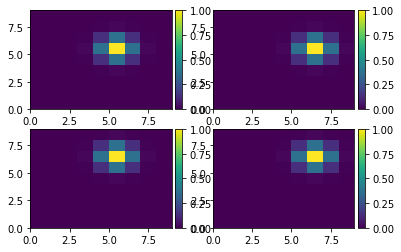

In [5]:
wfn = Wavefunction(wfnpar)
wfn.initialize_localized(1.0)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
mypcolormesh(ax1, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx), np.abs(wfn.elewfn)**2)
mypcolormesh(ax2, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx),
             np.abs(wfn.elewfn_shift(0, 1))**2)
mypcolormesh(ax3, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx), 
             np.abs(wfn.elewfn_shift(1, 0))**2)
mypcolormesh(ax4, np.arange(wfnpar.Mx), np.arange(wfnpar.Mx),
             np.abs(wfn.elewfn_shift(1, 1))**2)

In [6]:
wfn.rotwfn_d2dx()

array([[[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+

Let us now put the eigenstates of the Harmonic oscillator as the rotor states to check the differentiation, shift operators etc.

In [7]:
rotbasis_example = np.sin(np.arange(Mx)[np.newaxis, :, np.newaxis]*phi[:, np.newaxis, np.newaxis]) \
    + np.cos(np.arange(My)[np.newaxis, np.newaxis, :]*phi[:, np.newaxis, np.newaxis])        

wfn2 = Wavefunction(wfnpar)
wfn2.construct(wfn.elewfn, rotbasis_example)

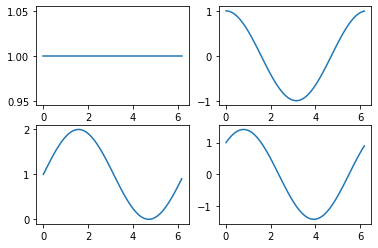

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn[:, 0, 0].real)
ax2.plot(phi, wfn2.rotwfn[:, 0, 1].real)
ax3.plot(phi, wfn2.rotwfn[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn[:, 1, 1].real)

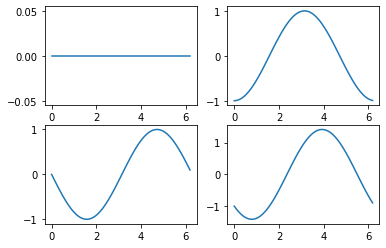

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn_d2dx()[:, 0, 0].real)
ax2.plot(phi, wfn2.rotwfn_d2dx()[:, 0, 1].real)
ax3.plot(phi, wfn2.rotwfn_d2dx()[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn_d2dx()[:, 1, 1].real)

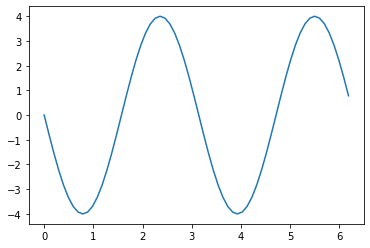

In [10]:
plt.plot(phi, wfn2.rotwfn_d2dx()[:, 2, 0].real)

In [11]:
wfn2.rotwfn_d2dx().dtype

dtype('complex128')

In [12]:
wfn2.rotwfn.dtype

dtype('complex128')

In [13]:
wfn2.elewfn.dtype

dtype('complex128')

In [14]:
wfn2.wfn

array([ 1.38879439e-11+0.j,  1.25015287e-09+0.j,  4.13993772e-08+0.j, ...,
        9.99200722e-16+0.j, -6.59036722e-02+0.j, -1.38617169e-01+0.j])

In [15]:
wfn2.normalize()

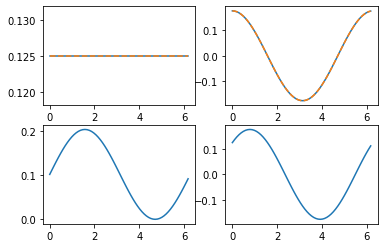

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn[:, 0, 0].real)
ax1.plot(phi, np.full((n,), n**(-0.5)), linestyle='dashed')
ax2.plot(phi, wfn2.rotwfn[:, 0, 1].real)
ax2.plot(phi, np.sqrt(2)*n**(-0.5)*np.cos(phi), linestyle='dashed')
ax3.plot(phi, wfn2.rotwfn[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn[:, 1, 1].real)

In [17]:
np.sum(np.full((n,), n**(-0.5))**2)

1.0

In [18]:
np.sum(np.abs(wfn2.rotwfn[:, 0, 0])**2)

1.0

In [19]:
np.sum((np.sqrt(2)*n**(-0.5)*np.cos(phi))**2)

1.0

In [20]:
np.sum(abs(wfn2.elewfn)**2)

0.9999999999999999

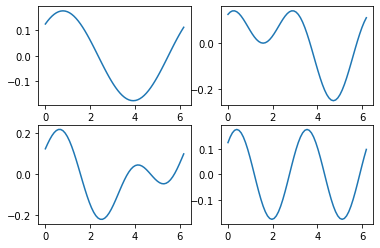

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 0, 0].real)
ax2.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 0, 1].real)
ax3.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 1, 0].real)
ax4.plot(phi, wfn2.rotwfn_shift(-1, -1)[:, 1, 1].real)

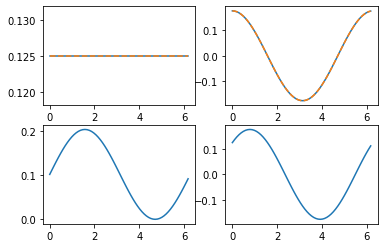

In [22]:
wfn3 = Wavefunction(wfnpar, array=wfn2.wfn)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(phi, wfn3.rotwfn[:, 0, 0].real)
ax1.plot(phi, np.full((n,), n**(-0.5)), linestyle='dashed')
ax2.plot(phi, wfn3.rotwfn[:, 0, 1].real)
ax2.plot(phi, np.sqrt(2)*n**(-0.5)*np.cos(phi), linestyle='dashed')
ax3.plot(phi, wfn3.rotwfn[:, 1, 0].real)
ax4.plot(phi, wfn3.rotwfn[:, 1, 1].real)